In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.impute import SimpleImputer
from datetime import timedelta
import chardet

import matplotlib.pyplot as plt

In [2]:
def clean_column_names(df):
    """
    Clean column names by removing special characters and standardizing format
    """
    df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)
    df.columns = df.columns.str.replace('ò', 'o', regex=False)
    df.columns = df.columns.str.replace('?', '', regex=False)
    return df

In [3]:
injuryHis= pd.read_csv('injury_history(injury_history).csv')
muscleImb = pd.read_csv('injury_history(muscle_imbalance_data).csv')
playerSess = pd.read_csv('injury_history(player_sessions).csv', encoding='latin1')

In [4]:
clean_column_names(injuryHis)
injuryHis

,PlayerID,Name,GroupId,InjuryType,BodyPart,Side,InjuryDate,Severity,RecoveryTimedays,AdditionalNotes
0,101,Jordan Matthews,201,Muscle Strain,Quadriceps,Right,12/5/2023,Grade 2,51,Grade 2 quadriceps strain with partial tearing...
1,101,Jordan Matthews,201,Tendonitis,Wrist,Left,10/25/2023,NaN,11,De Quervain's tenosynovitis. Swelling and pain...
2,101,Jordan Matthews,201,Tendonitis,Shoulder,Right,7/22/2023,NaN,12,Rotator cuff tendonitis due to overuse. Anti-i...
3,103,Malik Robinson,203,Strain,Groin,Right,6/28/2023,Grade 1,20,"Grade 1 groin strain, characterized by mild ov..."
4,103,Malik Robinson,203,Fracture,Wrist,Left,2/14/2023,NaN,68,Distal radius fracture. Cast applied. Recovery...
5,103,Malik Robinson,203,Concussion,Head,NaN,9/27/2023,Grade 1,11,Grade 1 concussion following a collision. Symp...
6,105,Noah Bradley,205,Tendonitis,Lower Back,NaN,1/13/2023,NaN,17,Chronic lower back tendonitis. Advised to avoi...
7,105,Noah Bradley,205,Concussion,Head,NaN,12/19/2023,Grade 2,15,Grade 2 concussion resulting from a moderate i...
8,105,Noah Bradley,205,Soreness,Lower Back,NaN,9/20/2023,NaN,5,Athlete reports mild to moderate lower back so...
9,106,Lennon Van,206,Dislocation,Knee,Right,1/1/2024,NaN,44,Patellar dislocation. The kneecap was relocate...


In [5]:
muscleImb.rename(columns={'Date Recorded': 'Session_Date'}, inplace=True)
clean_column_names(muscleImb)

muscleImb

,PlayerID,SessionID,PlayerName,Session_Date,HamstringToQuadRatio,QuadImbalancePercent,HamstringImbalancePercent,CalfImbalancePercent,GroinImbalancePercent
0,112,101,Anthony Lopez,1/1/2023,0.808741,-10.149294,-8.208145,-10.176416,-10.258755
1,112,102,Anthony Lopez,2/1/2023,0.814355,-10.105784,-8.229693,-10.106144,-10.063777
2,112,103,Anthony Lopez,3/1/2023,0.887331,-10.027546,-8.897757,-10.257486,-9.990676
3,112,104,Anthony Lopez,4/1/2023,0.929176,-10.137407,-9.419432,-10.220899,-10.179258
4,112,105,Anthony Lopez,5/1/2023,0.866234,-9.958386,-8.626291,-10.412659,-10.208611
...,...,...,...,...,...,...,...,...,...
177,108,109,Xavier Foster,9/1/2023,1.004553,-8.604023,-8.643197,-8.769887,-9.001803
178,108,110,Xavier Foster,10/1/2023,1.046780,-8.567371,-8.968151,-8.811672,-8.914926
179,108,111,Xavier Foster,11/1/2023,1.011286,-8.608297,-8.705451,-8.798980,-8.855761
180,108,112,Xavier Foster,12/1/2023,1.106029,-8.500787,-9.402117,-8.825422,-8.921670


In [6]:
playerSess.drop(columns=['Session.ID','Group.Id','Group.name','League.ID','Name'], inplace=True)
clean_column_names(playerSess)
playerSess

,PlayerID,Session_Date,Position,Distancemi,Distanceminmi,Durations,Steps,Speedofmax,Speedmaxmph,Speedmph,...,HeartRateminbpm,HeartRatemaxbpm,HumanCoreTemperatureF,HumanCoreTemperaturemaxF,TRIMP,HeartRateRecoveries,JumpHeightmaxft,ChangesofOrientation,Exertions,DiskUsage
0,112,1/1/2023,Center,4.58,0.12,5658,7277,82.73,19.55,6.46,...,74,198,99.47,101.24,261,5,2.31,229,307,58.56
1,112,1/3/2023,Center,1.18,0.11,5152,10386,75.51,11.55,9.23,...,62,179,99.56,99.33,270,6,2.44,427,180,44.93
2,112,1/4/2023,Center,5.59,0.14,6836,7033,99.96,19.87,7.40,...,78,172,100.06,102.31,149,4,3.04,383,440,15.32
3,112,1/6/2023,Center,3.22,0.09,6172,8463,86.47,12.17,9.70,...,64,186,100.45,101.10,180,10,3.17,462,450,21.46
4,112,1/7/2023,Center,2.19,0.10,6611,7134,65.50,12.27,5.62,...,62,146,98.73,100.91,152,4,1.28,118,416,20.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2599,108,12/24/2023,Guard,1.08,0.12,6016,11869,66.62,14.09,7.99,...,64,148,99.82,99.99,122,2,2.49,179,336,2.65
2600,108,12/25/2023,Guard,5.32,0.11,4025,9574,63.20,18.47,7.03,...,72,197,99.67,102.63,243,3,1.44,386,341,87.83
2601,108,12/26/2023,Guard,1.24,0.14,6372,10120,63.86,11.43,6.84,...,79,168,98.12,100.91,110,6,3.68,169,153,36.56
2602,108,12/28/2023,Guard,2.52,0.07,4554,5670,68.45,19.91,7.33,...,77,145,100.21,99.80,244,8,3.12,416,236,53.61


In [7]:
merged_df = pd.merge(playerSess, muscleImb, on=['PlayerID', 'Session_Date'], how='left')
merged_df.drop(columns=['PlayerName', 'SessionID'], inplace=True)
merged_df

,PlayerID,Session_Date,Position,Distancemi,Distanceminmi,Durations,Steps,Speedofmax,Speedmaxmph,Speedmph,...,HeartRateRecoveries,JumpHeightmaxft,ChangesofOrientation,Exertions,DiskUsage,HamstringToQuadRatio,QuadImbalancePercent,HamstringImbalancePercent,CalfImbalancePercent,GroinImbalancePercent
0,112,1/1/2023,Center,4.58,0.12,5658,7277,82.73,19.55,6.46,...,5,2.31,229,307,58.56,0.808741,-10.149294,-8.208145,-10.176416,-10.258755
1,112,1/3/2023,Center,1.18,0.11,5152,10386,75.51,11.55,9.23,...,6,2.44,427,180,44.93,NaN,NaN,NaN,NaN,NaN
2,112,1/4/2023,Center,5.59,0.14,6836,7033,99.96,19.87,7.40,...,4,3.04,383,440,15.32,NaN,NaN,NaN,NaN,NaN
3,112,1/6/2023,Center,3.22,0.09,6172,8463,86.47,12.17,9.70,...,10,3.17,462,450,21.46,NaN,NaN,NaN,NaN,NaN
4,112,1/7/2023,Center,2.19,0.10,6611,7134,65.50,12.27,5.62,...,4,1.28,118,416,20.51,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2599,108,12/24/2023,Guard,1.08,0.12,6016,11869,66.62,14.09,7.99,...,2,2.49,179,336,2.65,NaN,NaN,NaN,NaN,NaN
2600,108,12/25/2023,Guard,5.32,0.11,4025,9574,63.20,18.47,7.03,...,3,1.44,386,341,87.83,NaN,NaN,NaN,NaN,NaN
2601,108,12/26/2023,Guard,1.24,0.14,6372,10120,63.86,11.43,6.84,...,6,3.68,169,153,36.56,NaN,NaN,NaN,NaN,NaN
2602,108,12/28/2023,Guard,2.52,0.07,4554,5670,68.45,19.91,7.33,...,8,3.12,416,236,53.61,NaN,NaN,NaN,NaN,NaN


In [8]:
# Iterate through each row of player_sessions_df
merged_df['will_be_injured'] = 0  # Initialize column to 0
for index, row in playerSess.iterrows():
    player_id = row['PlayerID']
    session_date = pd.to_datetime(row['Session_Date'])  # Convert session_date to Timestamp

    # Find corresponding injury records for the player
    injury_records = injuryHis[injuryHis['PlayerID'] == player_id]

    # Check if any injury dates meet the criteria
    for _, injury_row in injury_records.iterrows():
        injury_date = pd.to_datetime(injury_row['InjuryDate'])  # Convert injury_date to Timestamp

        if session_date < injury_date and (injury_date - session_date).days <= 7:
            merged_df.loc[index, 'will_be_injured'] = 1
            break  # Stop checking once a matching injury is found

merged_df.to_csv('merged_data.csv', index=False)

In [9]:
merged_df

,PlayerID,Session_Date,Position,Distancemi,Distanceminmi,Durations,Steps,Speedofmax,Speedmaxmph,Speedmph,...,JumpHeightmaxft,ChangesofOrientation,Exertions,DiskUsage,HamstringToQuadRatio,QuadImbalancePercent,HamstringImbalancePercent,CalfImbalancePercent,GroinImbalancePercent,will_be_injured
0,112,1/1/2023,Center,4.58,0.12,5658,7277,82.73,19.55,6.46,...,2.31,229,307,58.56,0.808741,-10.149294,-8.208145,-10.176416,-10.258755,0
1,112,1/3/2023,Center,1.18,0.11,5152,10386,75.51,11.55,9.23,...,2.44,427,180,44.93,NaN,NaN,NaN,NaN,NaN,0
2,112,1/4/2023,Center,5.59,0.14,6836,7033,99.96,19.87,7.40,...,3.04,383,440,15.32,NaN,NaN,NaN,NaN,NaN,0
3,112,1/6/2023,Center,3.22,0.09,6172,8463,86.47,12.17,9.70,...,3.17,462,450,21.46,NaN,NaN,NaN,NaN,NaN,0
4,112,1/7/2023,Center,2.19,0.10,6611,7134,65.50,12.27,5.62,...,1.28,118,416,20.51,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2599,108,12/24/2023,Guard,1.08,0.12,6016,11869,66.62,14.09,7.99,...,2.49,179,336,2.65,NaN,NaN,NaN,NaN,NaN,0
2600,108,12/25/2023,Guard,5.32,0.11,4025,9574,63.20,18.47,7.03,...,1.44,386,341,87.83,NaN,NaN,NaN,NaN,NaN,0
2601,108,12/26/2023,Guard,1.24,0.14,6372,10120,63.86,11.43,6.84,...,3.68,169,153,36.56,NaN,NaN,NaN,NaN,NaN,0
2602,108,12/28/2023,Guard,2.52,0.07,4554,5670,68.45,19.91,7.33,...,3.12,416,236,53.61,NaN,NaN,NaN,NaN,NaN,0


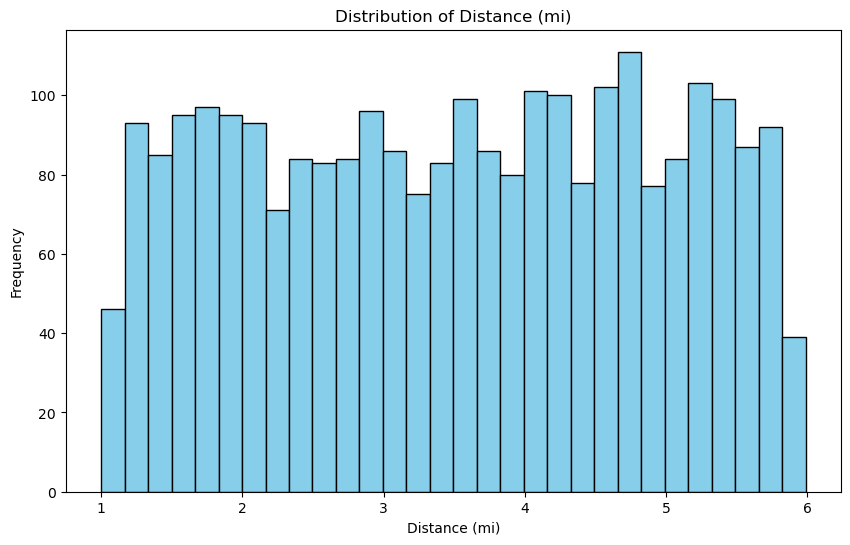

In [20]:

# Plot histogram for the 'Distancemi' column
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Distancemi'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Distance (mi)')
plt.xlabel('Distance (mi)')
plt.ylabel('Frequency')
plt.show()


/var/folders/fy/7wngbkd173v68x32t5czmh_w0000gn/T/ipykernel_32912/2454321303.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_df['Session_Date'] = pd.to_datetime(player_df['Session_Date'])


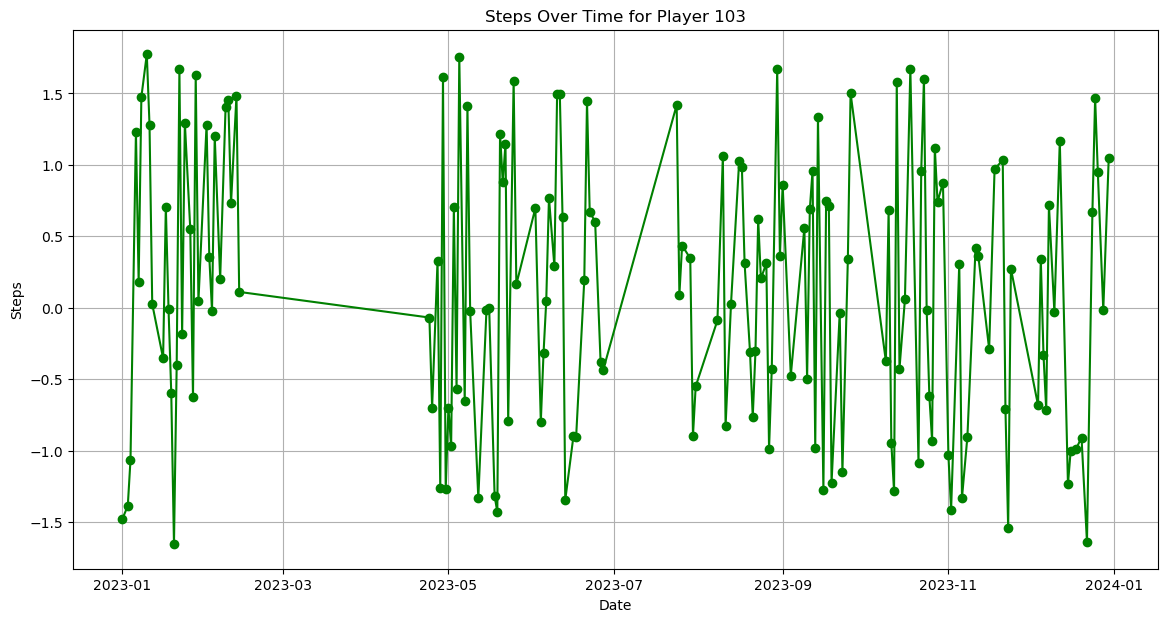

In [24]:
player_id = 103  # Replace 'your_player_id_here' with the actual player ID

# Filter the dataframe for the specific player
player_df = merged_df[merged_df['PlayerID'] == player_id]

# Convert 'Session_Date' to datetime
player_df['Session_Date'] = pd.to_datetime(player_df['Session_Date'])

# Line plot for 'Steps' over time for the specific player
plt.figure(figsize=(14, 7))
plt.plot(player_df['Session_Date'], player_df['Steps'], marker='o', linestyle='-', color='green')
plt.title('Steps Over Time for Player {}'.format(player_id))
plt.xlabel('Date')
plt.ylabel('Steps')
plt.grid(True)
plt.show()


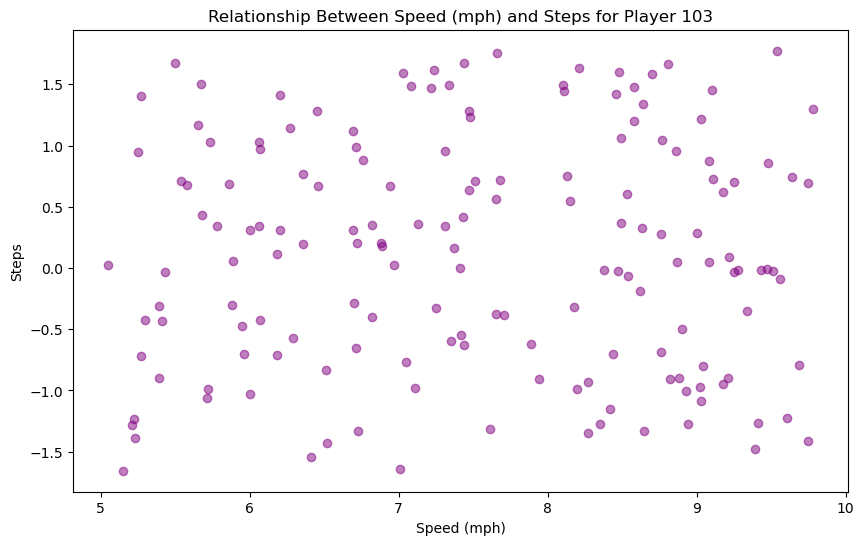

In [26]:
# Replace 'your_player_id_here' with the actual player ID
player_id = 103

# Filter the dataframe for the specific player
player_df = merged_df[merged_df['PlayerID'] == player_id]

# Plot the relationship between speed (mph) and steps for the specific player
plt.figure(figsize=(10, 6))
plt.scatter(player_df['Speedmph'], player_df['Steps'], alpha=0.5, color='purple')
plt.title('Relationship Between Speed (mph) and Steps for Player {}'.format(player_id))
plt.xlabel('Speed (mph)')
plt.ylabel('Steps')
plt.show()


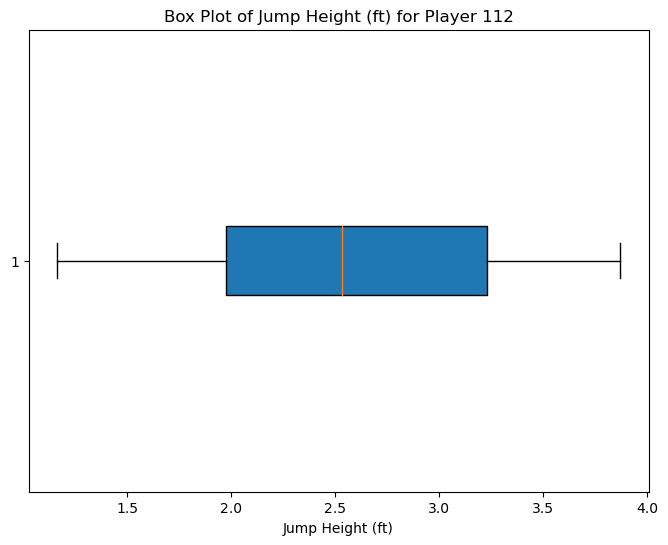

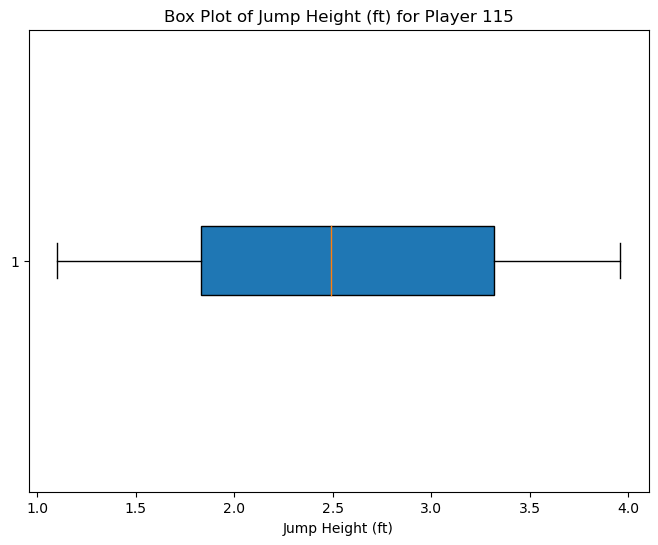

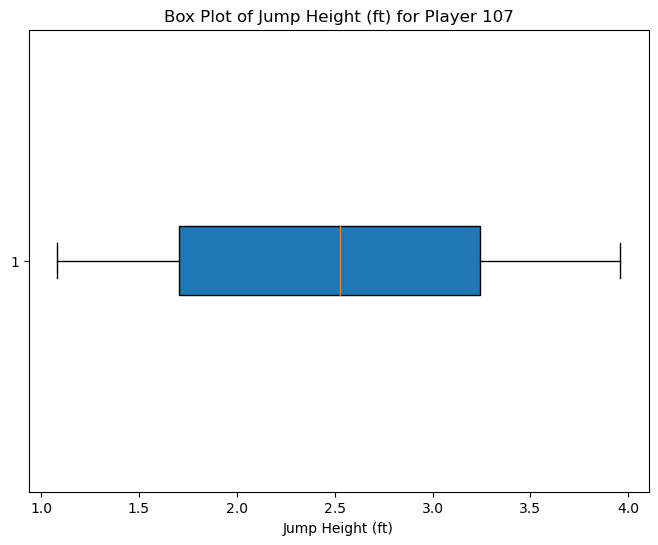

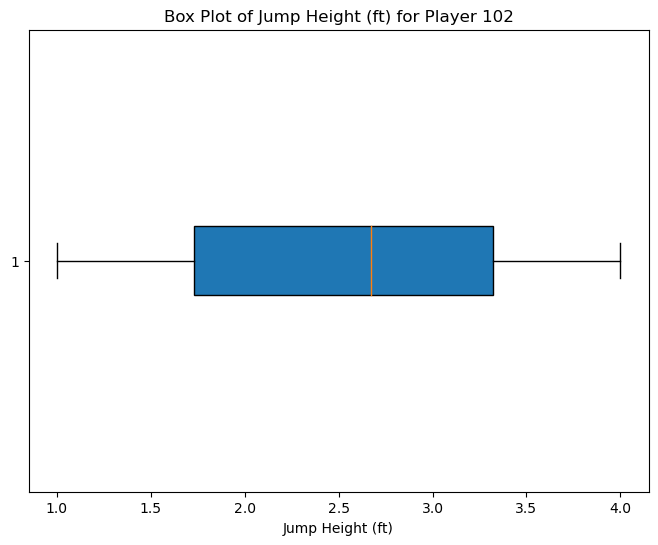

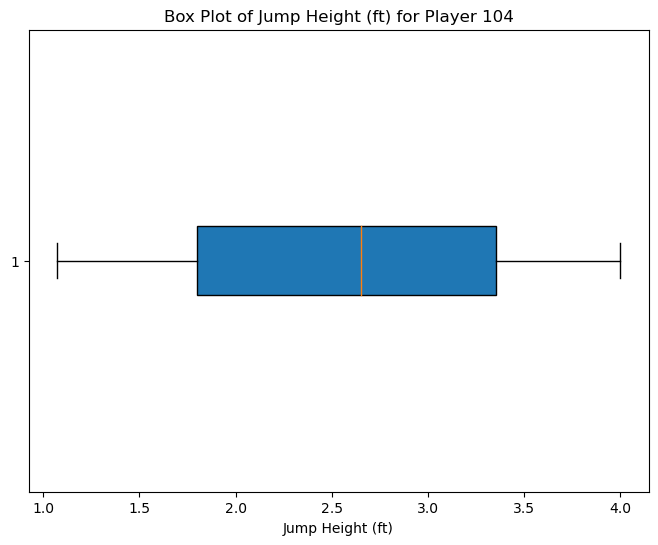

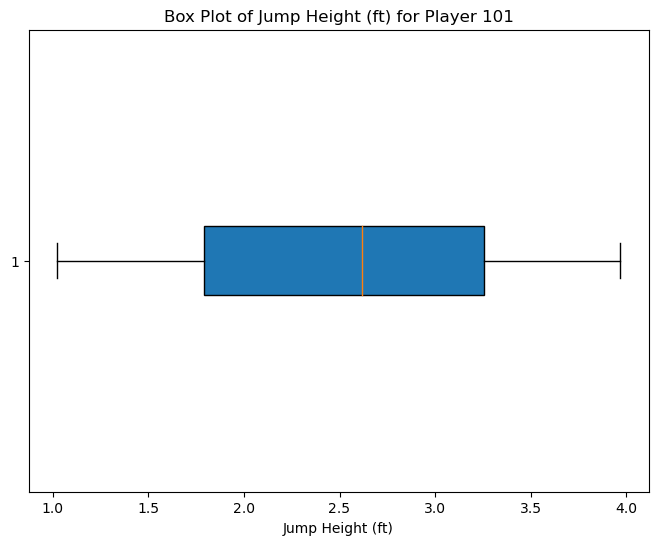

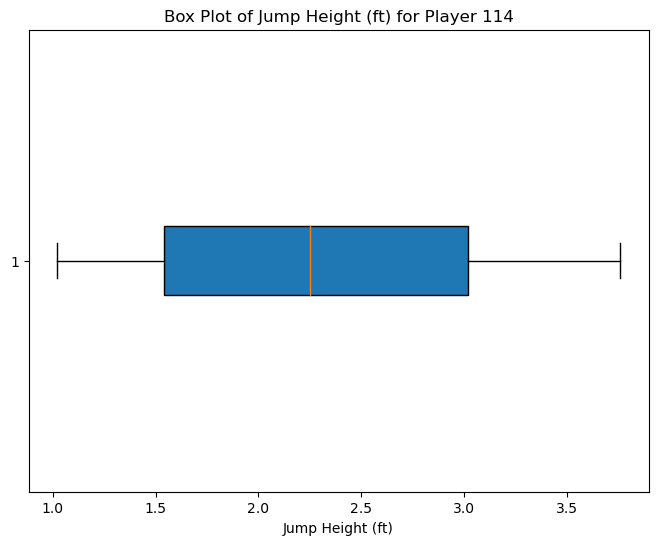

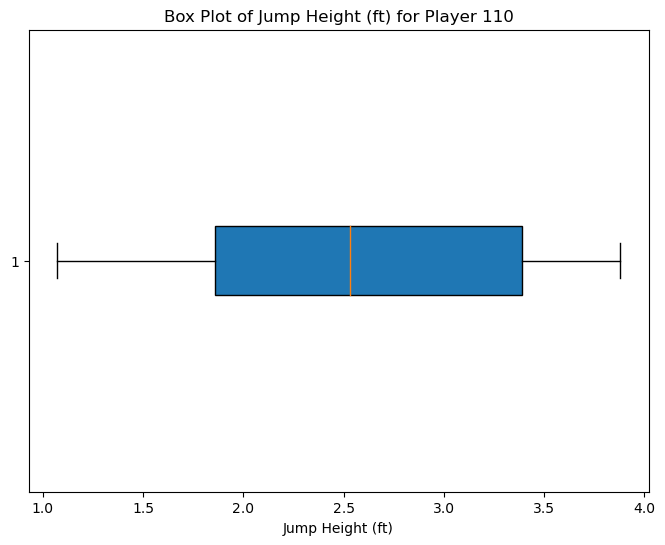

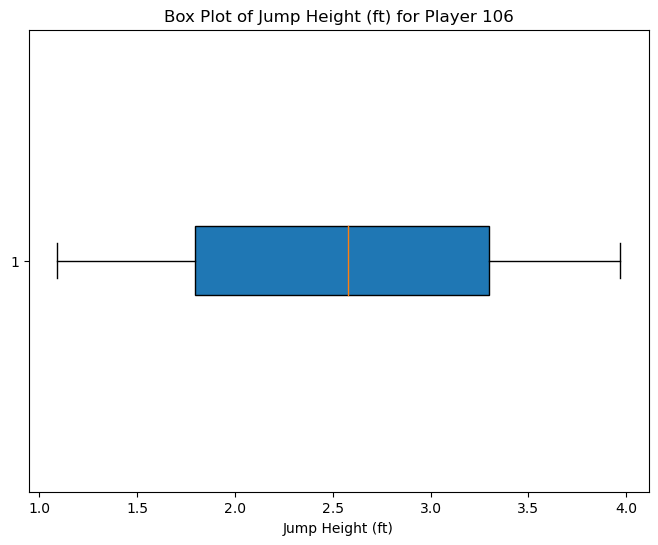

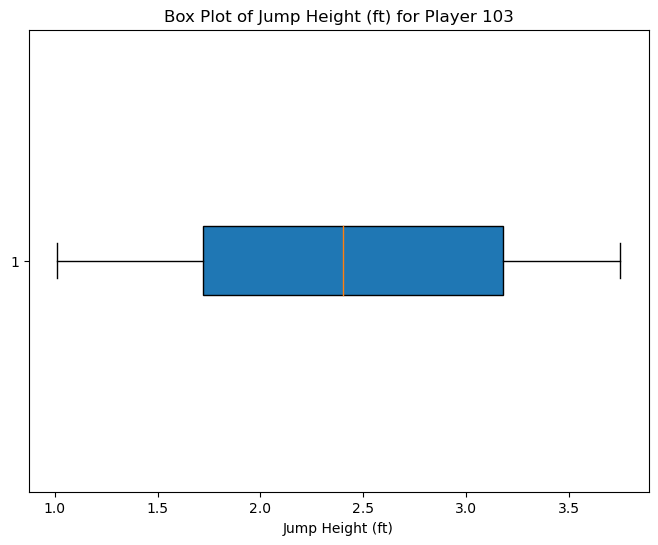

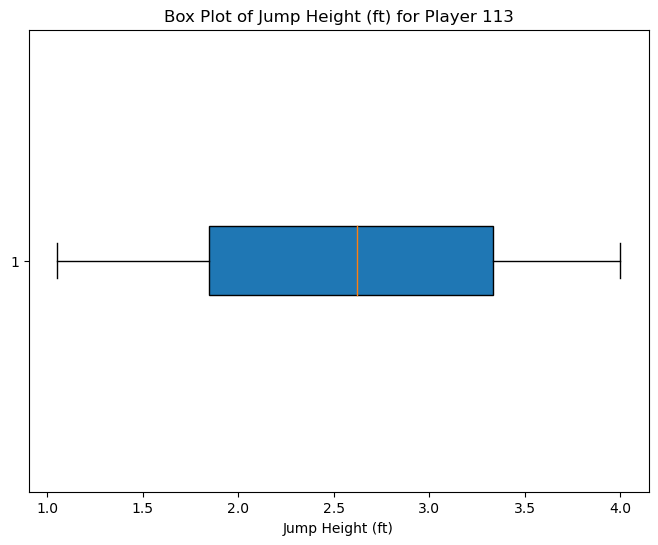

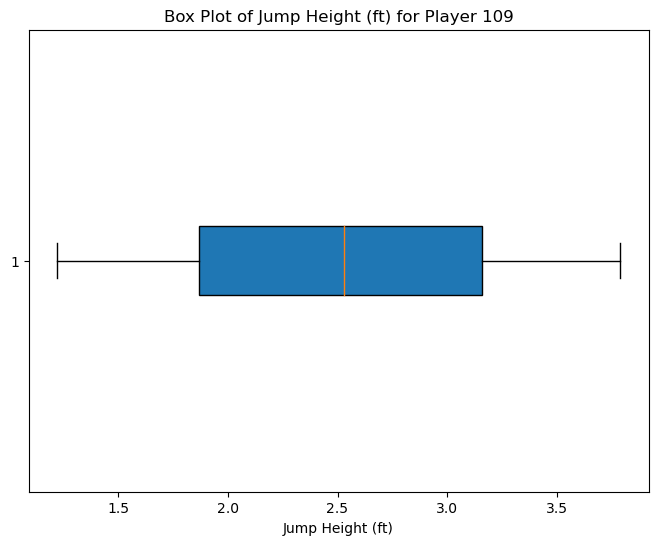

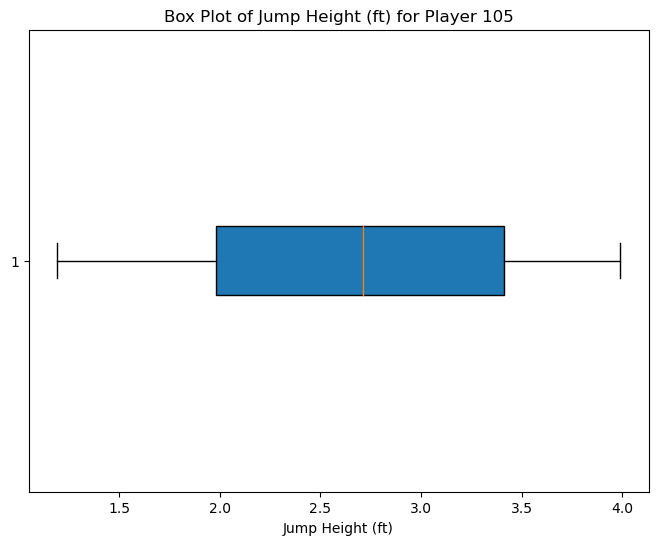

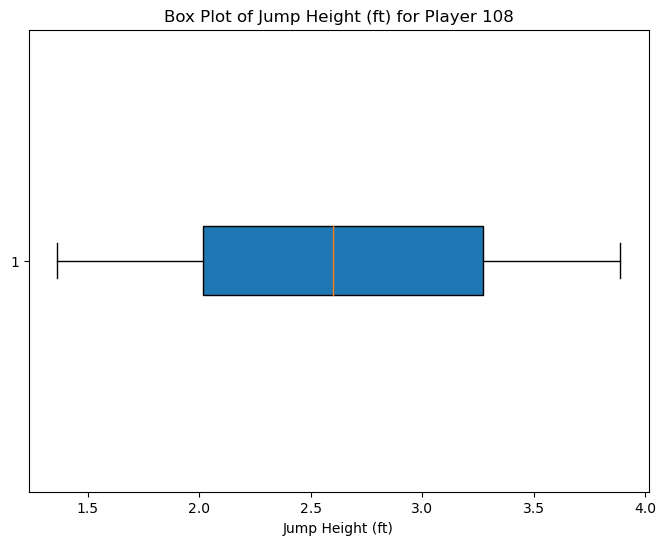

In [27]:
# Get the unique player IDs
player_ids = merged_df['PlayerID'].unique()

# Create a box plot for each player's jump height
for player_id in player_ids:
    player_data = merged_df[merged_df['PlayerID'] == player_id]
    jump_height = player_data['JumpHeightmaxft'].dropna()
    
    plt.figure(figsize=(8, 6))
    plt.boxplot(jump_height, vert=False, patch_artist=True)
    plt.title(f'Box Plot of Jump Height (ft) for Player {player_id}')
    plt.xlabel('Jump Height (ft)')
    plt.show()


In [10]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical variable
merged_df['Position'] = label_encoder.fit_transform(merged_df['Position'])
# Add more lines of code to encode other categorical variables

# Print the updated dataframe
merged_df


,PlayerID,Session_Date,Position,Distancemi,Distanceminmi,Durations,Steps,Speedofmax,Speedmaxmph,Speedmph,...,JumpHeightmaxft,ChangesofOrientation,Exertions,DiskUsage,HamstringToQuadRatio,QuadImbalancePercent,HamstringImbalancePercent,CalfImbalancePercent,GroinImbalancePercent,will_be_injured
0,112,1/1/2023,0,4.58,0.12,5658,7277,82.73,19.55,6.46,...,2.31,229,307,58.56,0.808741,-10.149294,-8.208145,-10.176416,-10.258755,0
1,112,1/3/2023,0,1.18,0.11,5152,10386,75.51,11.55,9.23,...,2.44,427,180,44.93,NaN,NaN,NaN,NaN,NaN,0
2,112,1/4/2023,0,5.59,0.14,6836,7033,99.96,19.87,7.40,...,3.04,383,440,15.32,NaN,NaN,NaN,NaN,NaN,0
3,112,1/6/2023,0,3.22,0.09,6172,8463,86.47,12.17,9.70,...,3.17,462,450,21.46,NaN,NaN,NaN,NaN,NaN,0
4,112,1/7/2023,0,2.19,0.10,6611,7134,65.50,12.27,5.62,...,1.28,118,416,20.51,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2599,108,12/24/2023,2,1.08,0.12,6016,11869,66.62,14.09,7.99,...,2.49,179,336,2.65,NaN,NaN,NaN,NaN,NaN,0
2600,108,12/25/2023,2,5.32,0.11,4025,9574,63.20,18.47,7.03,...,1.44,386,341,87.83,NaN,NaN,NaN,NaN,NaN,0
2601,108,12/26/2023,2,1.24,0.14,6372,10120,63.86,11.43,6.84,...,3.68,169,153,36.56,NaN,NaN,NaN,NaN,NaN,0
2602,108,12/28/2023,2,2.52,0.07,4554,5670,68.45,19.91,7.33,...,3.12,416,236,53.61,NaN,NaN,NaN,NaN,NaN,0


In [11]:
from sklearn.preprocessing import StandardScaler

# Select the continuous variables to be normalized
continuous_vars = ['Steps', 'Speedofmax', 'Speedmaxmph']

# Create an instance of StandardScaler
scaler = StandardScaler()

# Normalize the continuous variables
merged_df[continuous_vars] = scaler.fit_transform(merged_df[continuous_vars])

# Print the updated dataframe
merged_df


,PlayerID,Session_Date,Position,Distancemi,Distanceminmi,Durations,Steps,Speedofmax,Speedmaxmph,Speedmph,...,JumpHeightmaxft,ChangesofOrientation,Exertions,DiskUsage,HamstringToQuadRatio,QuadImbalancePercent,HamstringImbalancePercent,CalfImbalancePercent,GroinImbalancePercent,will_be_injured
0,112,1/1/2023,0,4.58,0.12,5658,-0.652919,0.526787,1.671027,6.46,...,2.31,229,307,58.56,0.808741,-10.149294,-8.208145,-10.176416,-10.258755,0
1,112,1/3/2023,0,1.18,0.11,5152,0.988211,-0.022618,-1.218172,9.23,...,2.44,427,180,44.93,NaN,NaN,NaN,NaN,NaN,0
2,112,1/4/2023,0,5.59,0.14,6836,-0.781718,1.837901,1.786595,7.40,...,3.04,383,440,15.32,NaN,NaN,NaN,NaN,NaN,0
3,112,1/6/2023,0,3.22,0.09,6172,-0.026872,0.811382,-0.994259,9.70,...,3.17,462,450,21.46,NaN,NaN,NaN,NaN,NaN,0
4,112,1/7/2023,0,2.19,0.10,6611,-0.728404,-0.784327,-0.958144,5.62,...,1.28,118,416,20.51,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2599,108,12/24/2023,2,1.08,0.12,6016,1.771034,-0.699101,-0.300852,7.99,...,2.49,179,336,2.65,NaN,NaN,NaN,NaN,NaN,0
2600,108,12/25/2023,2,5.32,0.11,4025,0.559585,-0.959345,1.280985,7.03,...,1.44,386,341,87.83,NaN,NaN,NaN,NaN,NaN,0
2601,108,12/26/2023,2,1.24,0.14,6372,0.847799,-0.909123,-1.261510,6.84,...,3.68,169,153,36.56,NaN,NaN,NaN,NaN,NaN,0
2602,108,12/28/2023,2,2.52,0.07,4554,-1.501198,-0.559847,1.801041,7.33,...,3.12,416,236,53.61,NaN,NaN,NaN,NaN,NaN,0


In [12]:
from sklearn.model_selection import StratifiedKFold, train_test_split
import numpy as np
from imblearn.over_sampling import RandomOverSampler


# split into X and y
y = merged_df['will_be_injured']
X = merged_df.drop(columns=['will_be_injured', 'Session_Date'])


skf = StratifiedKFold(n_splits=2)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.values[train_index, :], X.values[test_index, :]
    y_train, y_test = y[train_index], y[test_index]

res = RandomOverSampler(random_state=0)
X_resampled, y_resampled = res.fit_resample(X_train, y_train)

In [13]:
model = xgb.XGBClassifier(max_depth=3,
                      learning_rate=0.1,
                      n_estimators=100,
                      objective='binary:logistic',
                      booster='gbtree',
                      tree_method='auto',
                      n_jobs=50,
                      gamma=0,
                      min_child_weight=1,
                      max_delta_step=0,
                      subsample=1,
                      colsample_bytree=1,
                      colsample_bylevel=1,
                      colsample_bynode=1,
                      reg_alpha=0,
                      reg_lambda=1,
                      scale_pos_weight=1,
                      base_score=0.5,
                      random_state=42)
model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=0, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=50, num_parallel_tree=None, random_state=42, ...)

In [14]:
from sklearn.metrics import cohen_kappa_score, confusion_matrix, accuracy_score


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
cohen_kappa = cohen_kappa_score(y_test, y_pred)

print('Accuracy: {}'.format(accuracy))
print('Cohen kappa: {}'.format(cohen_kappa))
print('Confusion Matrix: \n {}'.format(conf_matrix))

Accuracy: 0.9600614439324117
Cohen kappa: -0.013502589742822035
Confusion Matrix: 
 [[1250   11]
 [  41    0]]


In [15]:
feature_importances = model.feature_importances_
feature_importances = pd.DataFrame(feature_importances, index = X.columns).reset_index().rename(columns={'index':'feature', 0:'importance'}).sort_values(by=['importance'], ascending=False)

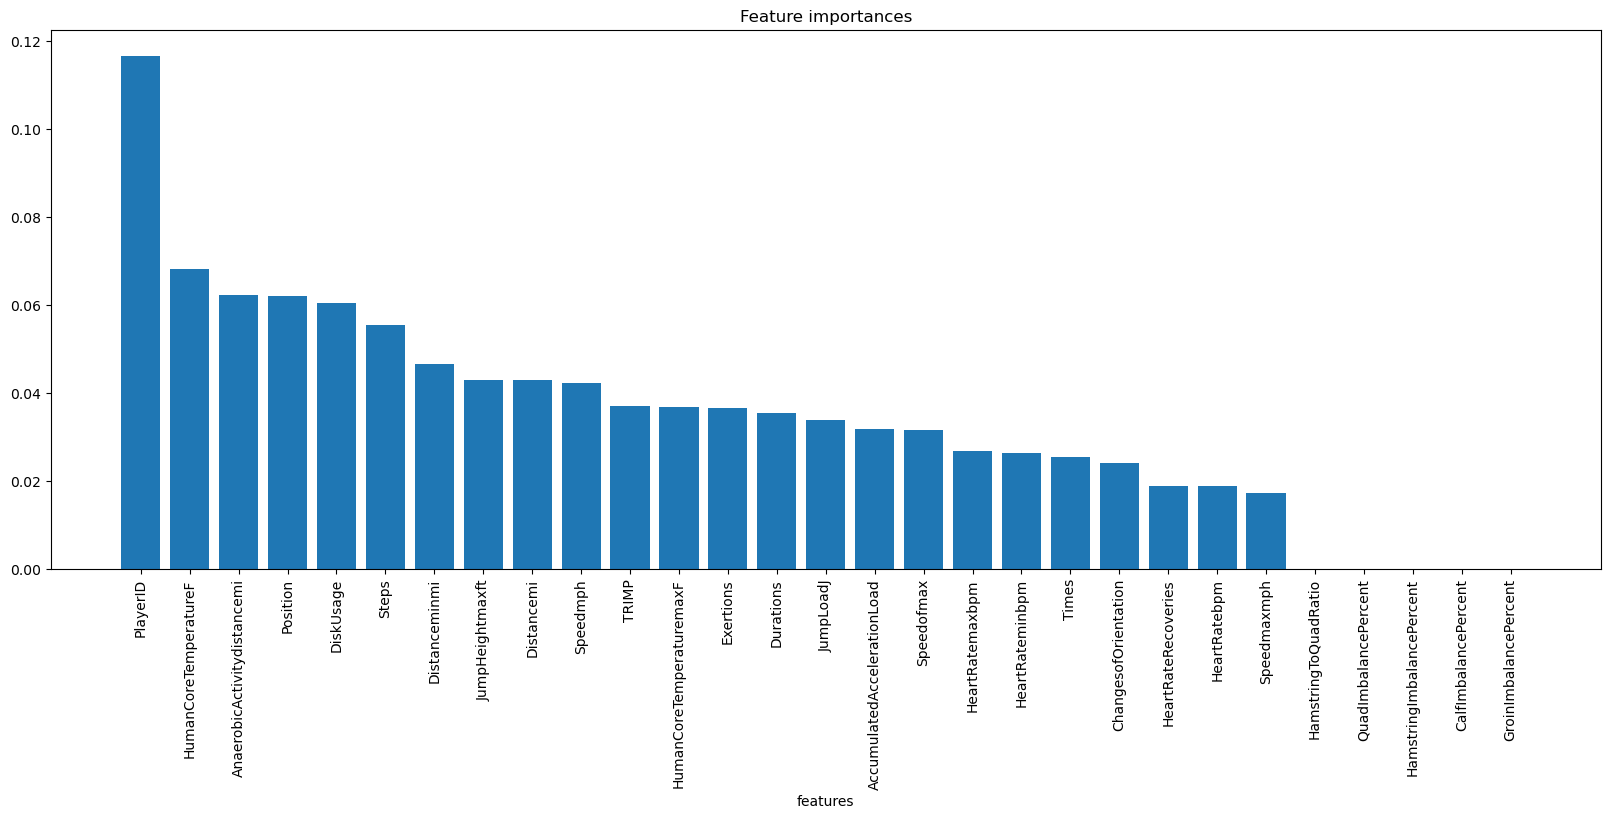

In [16]:
# plot as a bar chart
plt.figure(figsize=(20,7))
plt.bar(range(len(feature_importances)), feature_importances.importance.values)
plt.xticks(range(len(feature_importances)), feature_importances.feature.values, rotation=90)

plt.title('Feature importances')
plt.xlabel('features')
plt.show()

In [17]:


# # Define the features and target variables
features = merged_df.drop(columns=['will_be_injured','Session_Date'])
target = merged_df['will_be_injured']

# Impute missing values
imputer = SimpleImputer()
features_imputed = imputer.fit_transform(features)

# Predict the likelihood of injury for each player in the merged_df dataframe
player_predictions = []
for index, row in merged_df.iterrows():
    # Get the features for the player
    player_features = row.drop(['will_be_injured', 'Session_Date'])
    # Impute missing values
    player_features_imputed = imputer.transform([player_features])
    # Predict the likelihood of injury for the player
    player_prediction = model.predict_proba(player_features_imputed)[:, 1] * 100
    # Append the prediction to the player_predictions list
    player_predictions.append(player_prediction)

# Print the predicted probabilities for each player
# Aggregate the predicted probabilities by player ID
result_df = pd.DataFrame({'PlayerID': merged_df['PlayerID'], 'Likelihood of Injury': player_predictions })
result_df = result_df.groupby('PlayerID').mean() 

# Print the result
print(result_df)

/Users/rangelkoli/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/Users/rangelkoli/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/Users/rangelkoli/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/Users/rangelkoli/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/Users/rangelkoli/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/Users/rangelkoli/anaconda3/lib/pyt

         Likelihood of Injury
PlayerID                     
101                [19.96656]
102                [4.200028]
103                [4.502085]
104               [6.0685673]
105               [4.2176814]
106                [8.248673]
107                [9.695003]
108                [4.997473]
109               [10.565251]
110               [16.453196]
112               [19.463696]
113               [11.553666]
114               [10.832843]
115               [21.460468]


/Users/rangelkoli/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/Users/rangelkoli/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/Users/rangelkoli/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/Users/rangelkoli/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/Users/rangelkoli/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/Users/rangelkoli/anaconda3/lib/pyt

In [18]:
# import xgboost as xgb
# from sklearn.impute import SimpleImputer

# # Create the XGBoost model
# model = xgb.XGBClassifier()

# # Define the features and target variables
# features = merged_df.drop(columns=['will_be_injured','Session_Date'])
# target = merged_df['will_be_injured']

# # Impute missing values
# imputer = SimpleImputer()
# features_imputed = imputer.fit_transform(features)

# # Split the data into train and test sets
# train_features, test_features, train_target, test_target = train_test_split(features_imputed, target, test_size=0.2, random_state=42)

# # Train the model
# model.fit(train_features, train_target)

# # Predict the likelihood of injury for each player in the merged_df dataframe
# player_predictions = []
# for index, row in merged_df.iterrows():
#     # Get the features for the player
#     player_features = row.drop(['will_be_injured', 'Session_Date'])
#     # Impute missing values
#     player_features_imputed = imputer.transform([player_features])
#     # Predict the likelihood of injury for the player
#     player_prediction = model.predict_proba(player_features_imputed)[:, 1]
#     # Append the prediction to the player_predictions list
#     player_predictions.append(player_prediction)

# # Print the predicted probabilities for each player
# # Aggregate the predicted probabilities by player ID
# result_df = pd.DataFrame({'PlayerID': merged_df['PlayerID'], 'Likelihood of Injury': player_predictions})
# result_df = result_df.groupby('PlayerID').mean()

# # Print the result
# print(result_df)


In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(test_target, model.predict(test_features))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


NameError: name 'test_target' is not defined

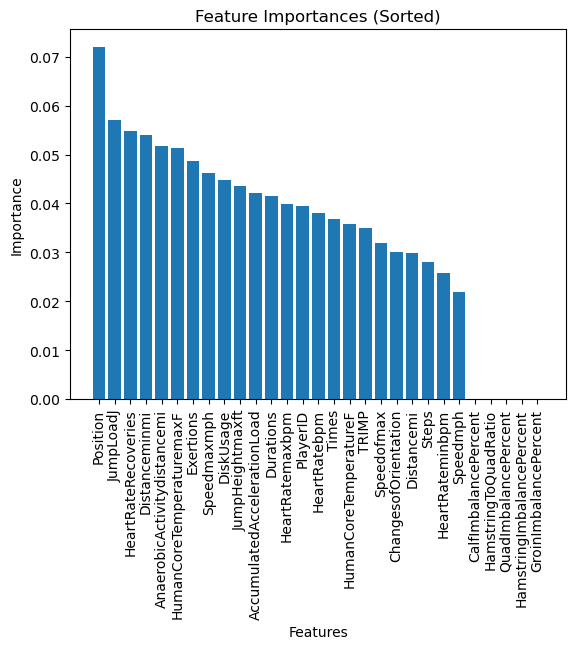

In [ ]:
# Sort the feature importances in descending order
sorted_indices = np.argsort(model.feature_importances_)[::-1]
sorted_features = features.columns[sorted_indices]
sorted_importances = model.feature_importances_[sorted_indices]

# Plot the sorted feature importances
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances (Sorted)')
plt.show()
